<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/02_Normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

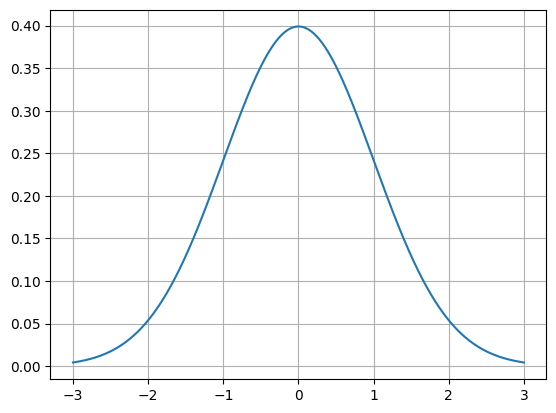

In [3]:
# CALCUATING MEAN AND STANDARD DEVIATION
mu = 0
sigma = 1
x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.grid()
# # Assume x = 1
# x=1
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'r-*')
# # Assume x = -1
# x=-1
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'b-*')
# # Assume x = 2
# x=2
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'k-*')
# print(norm.cdf(1, mu, sigma)-norm.cdf(-1, mu, sigma))

Text(0.5, 0, 'x')

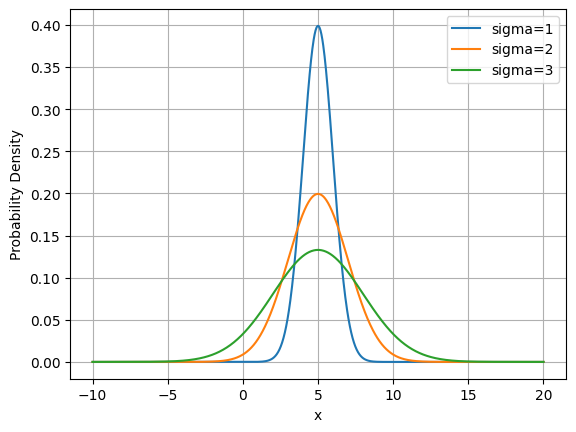

In [9]:
# CALCUATING MEAN AND STANDARD DEVIATION
mu = 5
sigma = 1
x = np.linspace(-10, 20, 1000)
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=1')
sigma = 2
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=2')
sigma = 3
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=3')
plt.legend()
plt.grid()
plt.ylabel('Probability Density')
plt.xlabel('x')

In [10]:
# norm.cdf() calculates the cumulative probability
N = 7
prob_less_than_N= norm.cdf(N, mu, sigma)
print(
    "The probability that a student will score less than", str(N), "is",
    round(prob_less_than_N, 4),
)

The probability that a student will score less than 7 is 0.7475


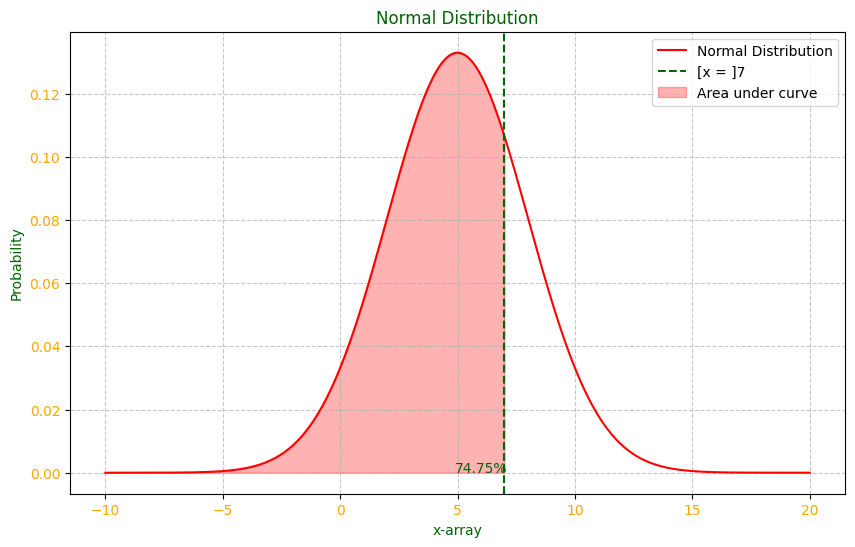

In [11]:
# Calculate the area under the curve up to x = N
area_under_curve = norm.cdf(N, mu, sigma)
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x, norm.pdf(x, mu, sigma), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("[x = ]"+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu, sigma), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)


In [12]:
prob_max = 1 - norm.cdf(7.9, mu, sigma)
print(
    "The probability that a value will be more than 7.9 is",
    round(prob_max, 4),
)

The probability that a value will be more than 7.9 is 0.1669


In [13]:
import xarray as xr

In [ ]:
df = xr.tutorial.open_dataset("air_temperature")
df

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

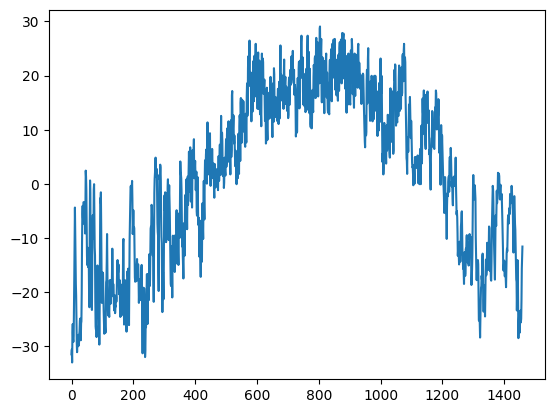

In [ ]:
# let's look at the 2014
ds = df.sel(time=slice("2014-01-01", "2014-12-31"))
plt.plot(ds.air[:,10,25]-273.15)

(array([ 3.,  5., 11., 11., 25., 21., 25., 36., 24., 45., 41., 53., 36.,
        35., 31., 29., 35., 31., 27., 43., 39., 53., 58., 48., 43., 37.,
        36., 35., 51., 61., 60., 78., 55., 64., 60., 41., 35., 20., 15.,
         4.]),
 array([-32.95, -31.4 , -29.85, -28.3 , -26.75, -25.2 , -23.65, -22.1 ,
        -20.55, -19.  , -17.45, -15.9 , -14.35, -12.8 , -11.25,  -9.7 ,
         -8.15,  -6.6 ,  -5.05,  -3.5 ,  -1.95,  -0.4 ,   1.15,   2.7 ,
          4.25,   5.8 ,   7.35,   8.9 ,  10.45,  12.  ,  13.55,  15.1 ,
         16.65,  18.2 ,  19.75,  21.3 ,  22.85,  24.4 ,  25.95,  27.5 ,
         29.05]),
 <BarContainer object of 40 artists>)

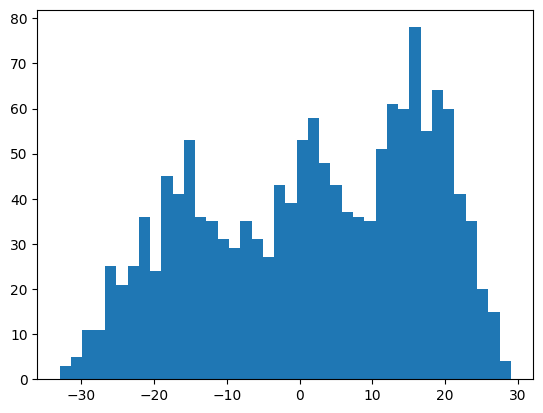

In [ ]:
plt.hist(ds.air[:,10,25]-273.15,bins=40)

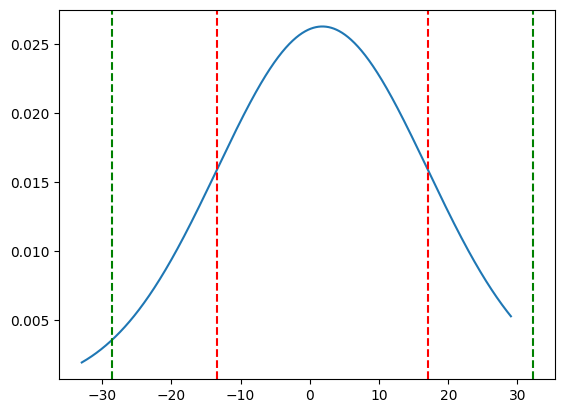

In [ ]:
mu = ds.air[:,10,25].mean()-273.15
sigma = ds.air[:,10,25].std()
x = np.linspace(ds.air[:,10,25].min()-273.15, ds.air[:,10,25].max()-273.15, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
# Draw a red vertical line at nu+-sigma
plt.axvline(x=mu+sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
plt.axvline(x=mu-sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
# Draw a red vertical line at nu+-2sigma
plt.axvline(x=mu+2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))
plt.axvline(x=mu-2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))

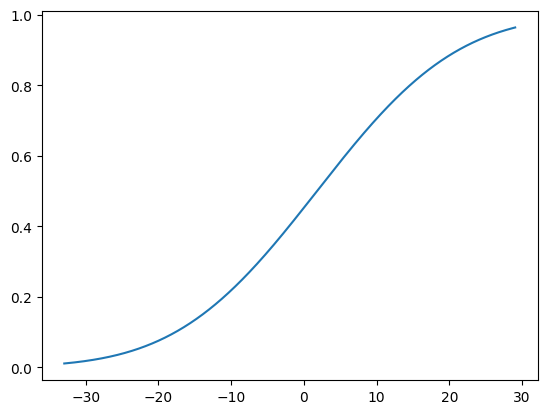

In [ ]:
plt.plot(x, norm.cdf(x, mu, sigma))

In [ ]:
sigma

<xarray.DataArray 'air' ()> Size: 8B
array(15.1922099)
Coordinates:
    lat      float32 4B 50.0
    lon      float32 4B 262.5

(array([ 3.,  5., 11., 11., 25., 21., 25., 36., 24., 45., 41., 53., 36.,
        35., 31., 29., 35., 31., 27., 43., 39., 53., 58., 48., 43., 37.,
        36., 35., 51., 61., 60., 78., 55., 64., 60., 41., 35., 20., 15.,
         4.]),
 array([-34.76047945, -33.21047945, -31.66047945, -30.11047945,
        -28.56047945, -27.01047945, -25.46047945, -23.91047945,
        -22.36047945, -20.81047945, -19.26047945, -17.71047945,
        -16.16047945, -14.61047945, -13.06047945, -11.51047945,
         -9.96047945,  -8.41047945,  -6.86047945,  -5.31047945,
         -3.76047945,  -2.21047945,  -0.66047945,   0.88952055,
          2.43952055,   3.98952055,   5.53952055,   7.08952055,
          8.63952055,  10.18952055,  11.73952055,  13.28952055,
         14.83952055,  16.38952055,  17.93952055,  19.48952055,
         21.03952055,  22.58952055,  24.13952055,  25.68952055,
         27.23952055]),
 <BarContainer object of 40 artists>)

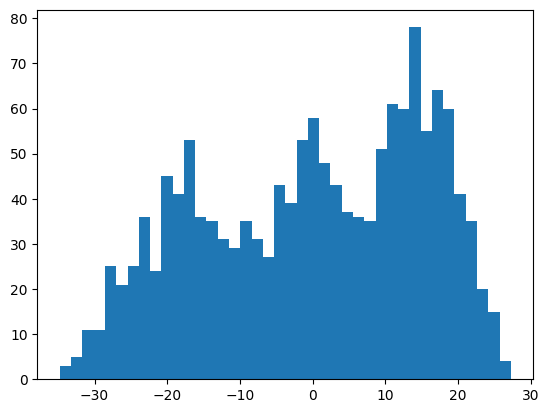

In [ ]:
Temp = ds.air[:,10,25]-273.15
plt.hist(Temp-Temp.mean(),bins=40)

In [ ]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.1 MB/s eta 0:00:00


In [ ]:
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'
#The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.
!wget -nc {url}

--2025-03-03 17:36:49--  https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25559869 (24M) [application/x-gzip]
Saving to: ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’

gistemp1200_GHCNv4_ 100%[===================>]  24.38M  1.93MB/s    in 10s     

2025-03-03 17:37:00 (2.38 MB/s) - ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ saved [25559869/25559869]



In [ ]:
ds = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')
ds

<xarray.Dataset> Size: 113MB
Dimensions:      (lat: 90, lon: 180, time: 1741, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-01-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 113MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2025-02-07 07:05:00 by SBBX_to_nc 2.0 - ILAND=1200,...

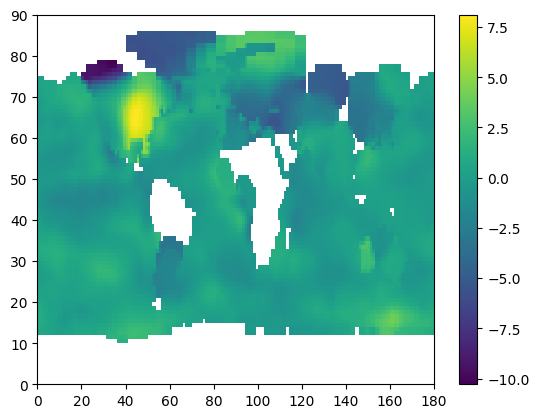

In [ ]:
plt.pcolormesh(ds.tempanomaly[0,:,:]);plt.colorbar()

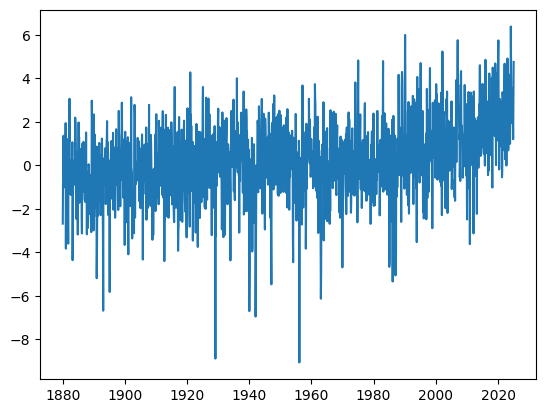

In [ ]:
plt.plot(ds.time,ds.tempanomaly[:,70,100])

(array([  2.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   2.,   4.,
          5.,   6.,   9.,  11.,  22.,  23.,  44.,  54.,  84., 122., 120.,
        155., 194., 159., 157., 139., 118.,  89.,  75.,  42.,  36.,  20.,
         14.,  11.,  11.,   3.,   1.,   3.,   1.]),
 array([-9.05999947, -8.67399979, -8.28799915, -7.90199947, -7.51599979,
        -7.12999964, -6.74399948, -6.3579998 , -5.97199965, -5.58599949,
        -5.19999981, -4.81399965, -4.4279995 , -4.04199982, -3.65599966,
        -3.26999974, -2.88399982, -2.49799991, -2.11199999, -1.72599983,
        -1.33999991, -0.95399994, -0.56799996, -0.18199998,  0.204     ,
         0.58999997,  0.97599995,  1.36199999,  1.74799991,  2.13399982,
         2.51999998,  2.9059999 ,  3.29199982,  3.67799973,  4.06399965,
         4.44999981,  4.83599949,  5.22199965,  5.6079998 ,  5.99399948,
         6.37999964]),
 <BarContainer object of 40 artists>)

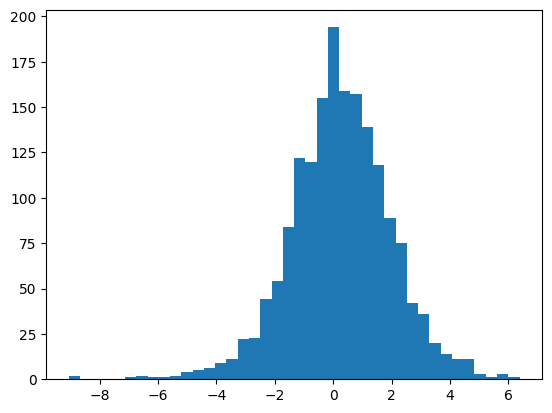

In [ ]:
plt.hist(ds.tempanomaly[:,70,100],bins=40)

<Axes: ylabel='Count'>

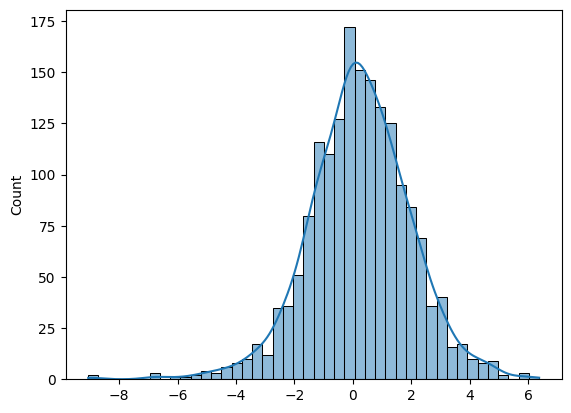

In [ ]:
import seaborn as sns
sns.histplot(ds.tempanomaly[:,70,100], kde=True)

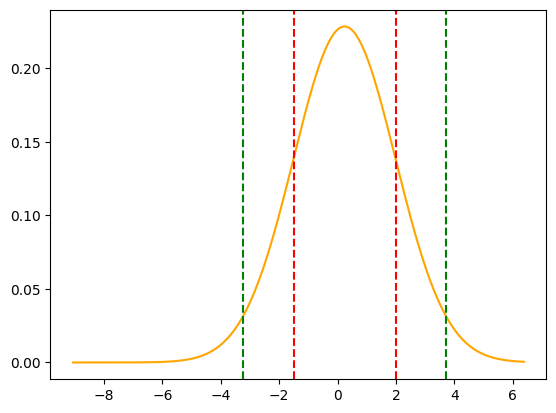

In [ ]:
mu = ds.tempanomaly[:,70,100].mean()
sigma = ds.tempanomaly[:,70,100].std()
x = np.linspace(ds.tempanomaly[:,70,100].min(), ds.tempanomaly[:,70,100].max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma),color='orange')
# Draw a red vertical line at nu+-sigma
plt.axvline(x=mu+sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
plt.axvline(x=mu-sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
# Draw a red vertical line at nu+-2sigma
plt.axvline(x=mu+2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))
plt.axvline(x=mu-2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))

In [ ]:
# norm.cdf() calculates the cumulative probability
N = -2
prob_less_than_N= norm.cdf(N, mu, sigma)
print(
    "The probability that a student will score less than", str(N), "is",
    round(prob_less_than_N, 4),
)
# Calculate the area under the curve up to x = N
area_under_curve = norm.cdf(N, mu, sigma)

The probability that a student will score less than -2 is 0.1


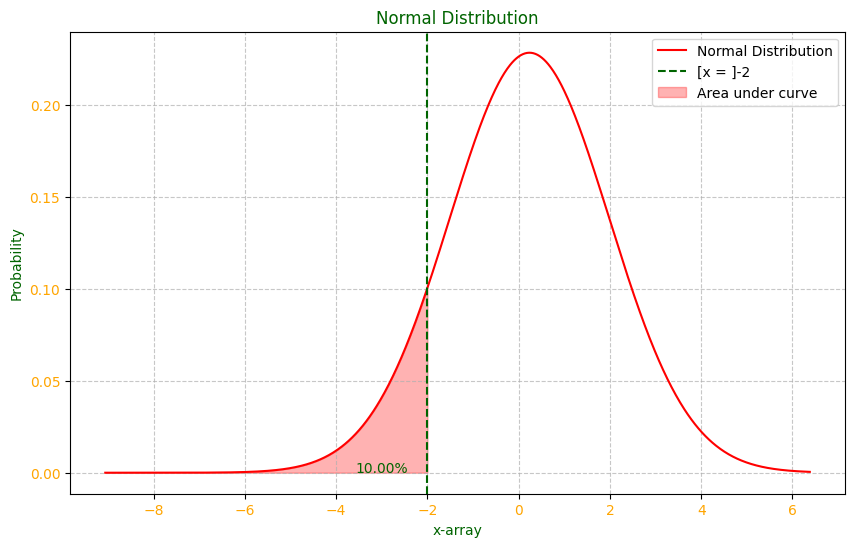

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x, norm.pdf(x, mu, sigma), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("[x = ]"+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu, sigma), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)

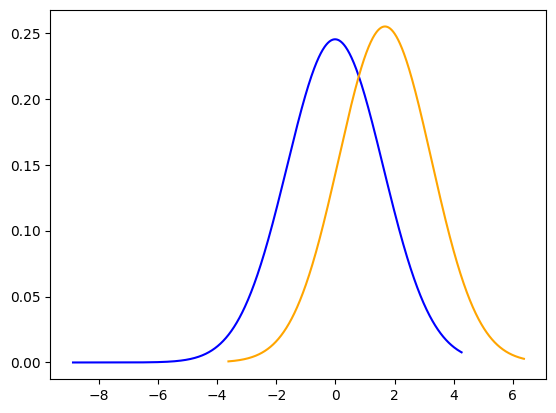

In [ ]:
Thist = ds.tempanomaly[:,70,100].sel(time=slice('1920','1939'))
Twarm = ds.tempanomaly[:,70,100].sel(time=slice('2000','2024'))
mu1 = Thist.mean()
sigma1 = Thist.std()
mu2 = Twarm.mean()
sigma2 = Twarm.std()
x1 = np.linspace(Thist.min(), Thist.max(), 1000)
plt.plot(x1, norm.pdf(x1, mu1, sigma1),color='blue')
x2 = np.linspace(Twarm.min(), Twarm.max(), 1000)
plt.plot(x2, norm.pdf(x2, mu2, sigma2),color='orange')

# # Draw a red vertical line at nu+-sigma
# plt.axvline(x=mu+sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
# plt.axvline(x=mu-sigma, color="red", linestyle="--", label=("[x = ]"+str(N)))
# # Draw a red vertical line at nu+-2sigma
# plt.axvline(x=mu+2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))
# plt.axvline(x=mu-2*sigma, color="green", linestyle="--", label=("[x = ]"+str(N)))